In [42]:
%run Function_set.ipynb
import networkx as nx
import numpy as np
from collections import defaultdict
import random
from numpy import random
import matplotlib.pyplot as plt

In [43]:
network,pos = Make_Question(3,3,Density = 0.85, option = "1-norm", distance = 2)

print(network)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 1. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 1. 1. 0.]]


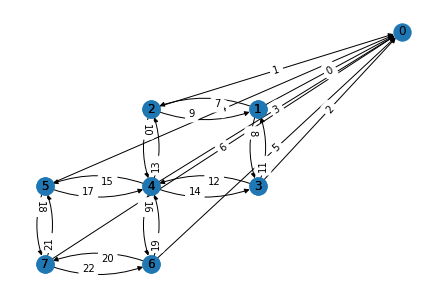

In [44]:
G, compelete_label, graph = complete_Graph(network,pos)

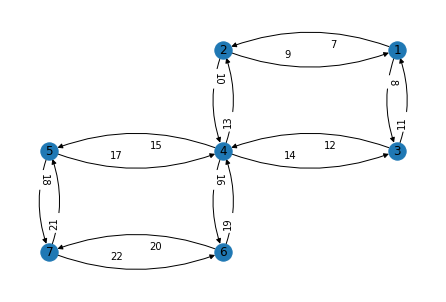

In [45]:
G_prime, sub_edge_label, sub_graph = sub_Graph (network,pos)

In [74]:
%run Function_set.ipynb
Final_map, lowest_edge_number = edge_map(G, compelete_label, sub_edge_label)

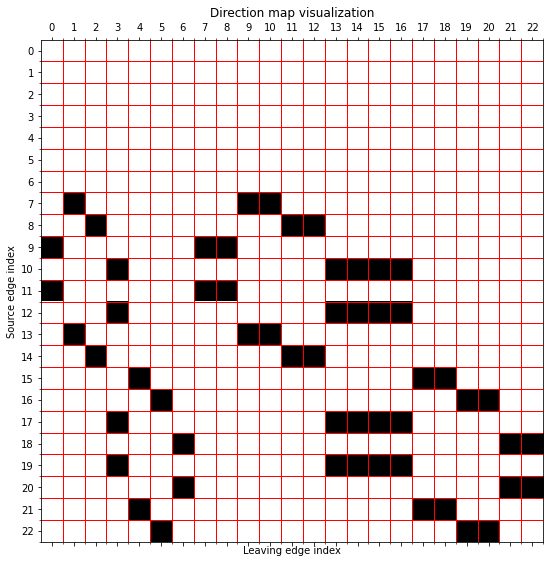

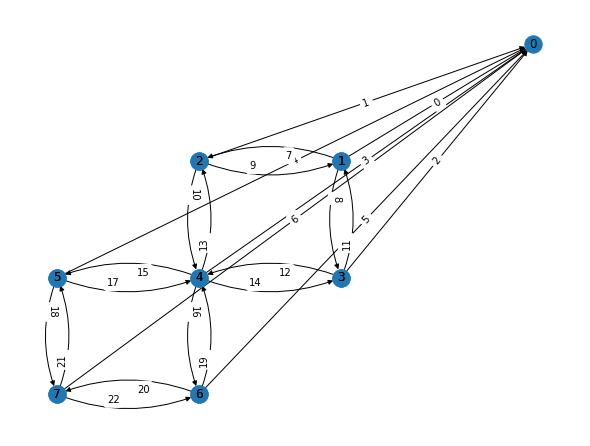

In [75]:
#matfig = plt.figure(figsize=(Final_map.shape[0],Final_map.shape[1]))
matfig = plt.figure(figsize=(9,9))
plt.matshow(Final_map,cmap=plt.cm.binary,fignum=matfig.number)
ax = plt.gca()
#plt.matshow(Final_map,cmap=plt.cm.binary)
plt.xlabel('Leaving edge index')
plt.ylabel('Source edge index')
plt.title ("Direction map visualization")

# Major ticks
ax.set_xticks(np.arange(0, Final_map.shape[0], step=1))
ax.set_yticks(np.arange(0, Final_map.shape[0], step=1))

# Labels for major ticks
ax.set_xticklabels(np.arange(0, Final_map.shape[0], step=1))
ax.set_yticklabels(np.arange(0, Final_map.shape[0], step=1))

# Minor ticks
ax.set_xticks(np.arange(0.5, Final_map.shape[0]+0.5, step=1), minor=True)
ax.set_yticks(np.arange(0.5, Final_map.shape[0]+0.5, step=1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='r', linestyle='-', linewidth=1)

plt.show()


plt.figure(2,figsize=(8,6)) 
_, _, _ = complete_Graph(network,pos)

In [76]:
# basic_cost shape => (1,number_of_edge)
# such as : basic_cost = np.vstack(np.ones(number_of_edge))
basic_cost = np.vstack(np.ones(len(compelete_label)))

QUBO_Obj = Objective(pos,compelete_label,basic_cost,flow_cost = 1)

In [77]:
#a = np.array([1,3,5])
#b = np.array([2,4,6,8,10,12])
#x,y = np.meshgrid(a,b)
#print(x,y)
#np.concatenate((x.reshape(-1,1), y.reshape(-1,1)), axis=1)
penal = 20

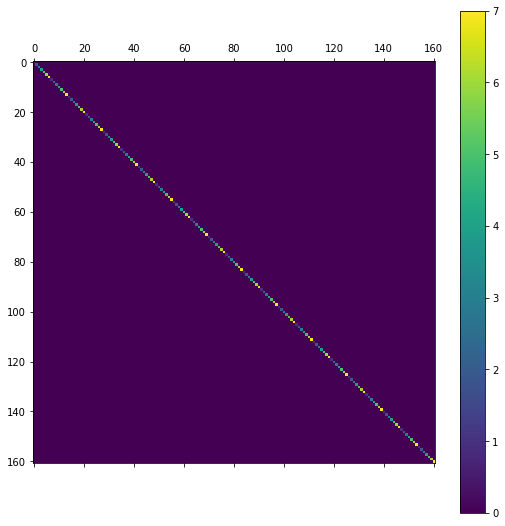

In [78]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Obj,fignum=matfig.number)
plt.colorbar()
plt.show()

In [79]:
QUBO_Constraint_1 = Constraint_1(pos,compelete_label,Final_map,penalty = penal)

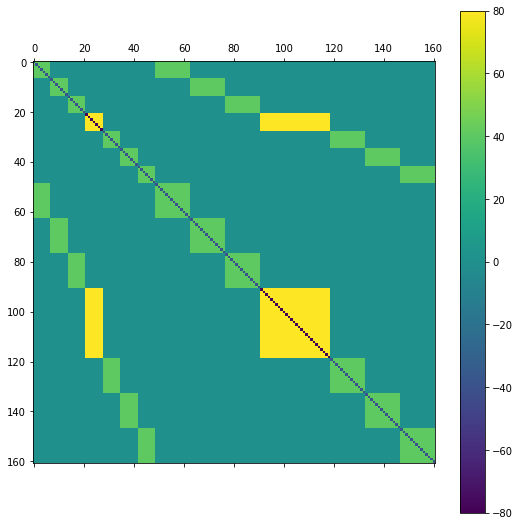

In [80]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Constraint_1,fignum=matfig.number)
plt.colorbar()
plt.show()

In [81]:
QUBO_Constraint_2 = Constraint_2(pos,compelete_label,Final_map,penalty = penal)

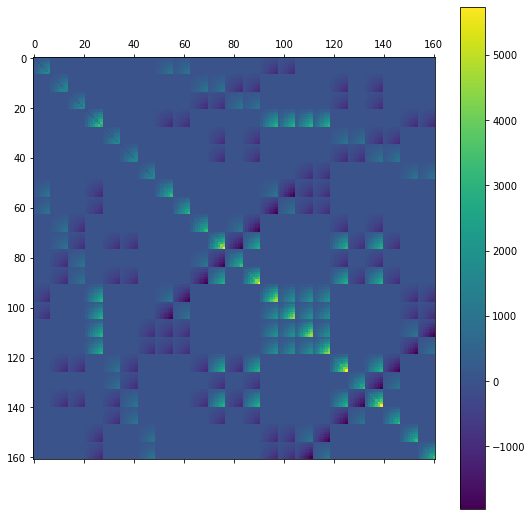

In [82]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_Constraint_2,fignum=matfig.number)
plt.colorbar()
plt.show()

In [83]:
QUBO_matrix = QUBO_Obj + QUBO_Constraint_1 + QUBO_Constraint_2

print(np.shape(QUBO_matrix ))

(161, 161)


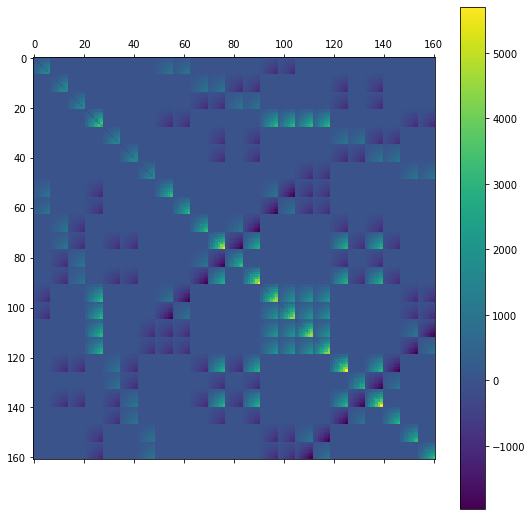

In [84]:
matfig = plt.figure(figsize=(9,9)) 
plt.matshow(QUBO_matrix,fignum=matfig.number)
plt.colorbar()
plt.show()

In [85]:
m_t_u,m_t_l = capacity_subtree_limit_generator(pos,lowest_edge_number)

QUBO_matrix_1 = Constraint_3_part_1(pos,compelete_label,lowest_edge_number,QUBO_matrix,m_t_u,penalty = penal)
QUBO_matrix_2 = Constraint_3_part_2(pos,compelete_label,lowest_edge_number,QUBO_matrix_1,m_t_l,penalty = penal)

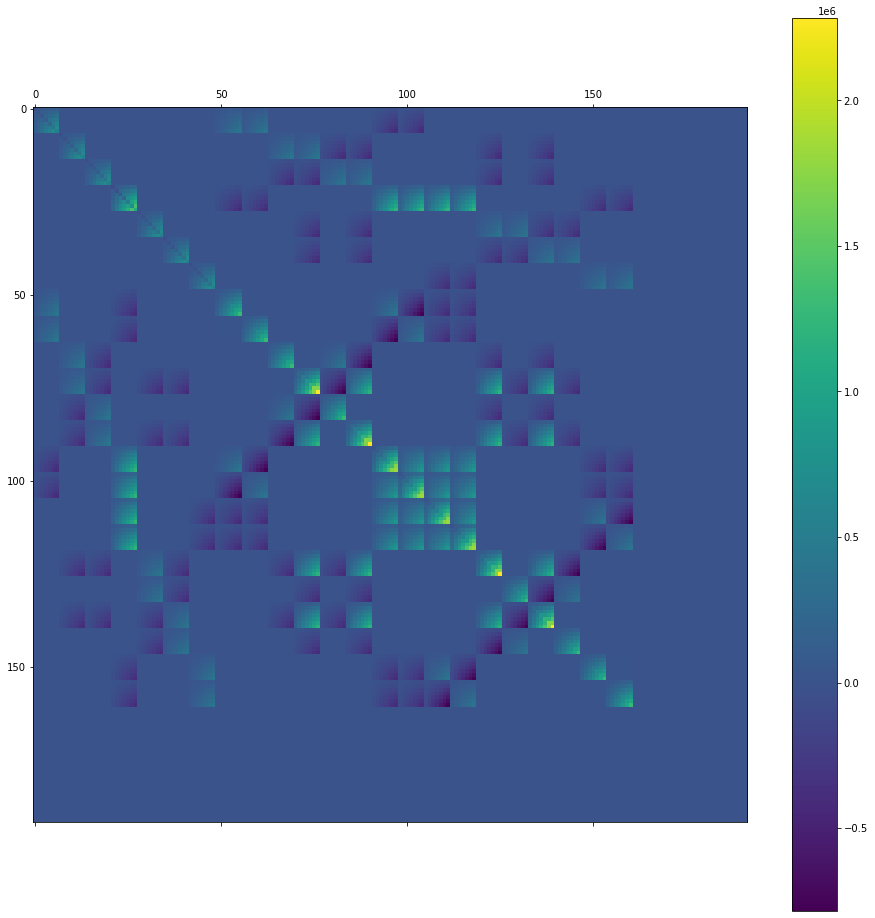

In [86]:
matfig = plt.figure(figsize=(16,16)) 
plt.matshow(QUBO_matrix_2,fignum=matfig.number)
plt.colorbar()
plt.show()

In [87]:
Q = len(pos)-1 
energy_level_ban = 2
Q_ban = np.arange(energy_level_ban)
Ban_map = np.zeros((lowest_edge_number*Q))

##
Ban_index_pre = np.vstack(np.arange(lowest_edge_number)*Q) + np.tile(Q_ban,(lowest_edge_number,1))

Ban_index = Ban_index_pre.flatten()
##

Ban_map[Ban_index] = 1

print(Ban_index,Ban_map)

QUBO_Constraint_4 = Constraint_4(lowest_edge_number,Ban_map,penalty = 1e6)

QUBO_matrix_2[:lowest_edge_number*(len(pos)-1),:lowest_edge_number*(len(pos)-1)] +=  QUBO_Constraint_4

Final_QUBO_matrix = QUBO_matrix_2

print(np.shape(Final_QUBO_matrix))

[ 0  1  7  8 14 15 21 22 28 29 35 36 42 43] [1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0.]
(192, 192)


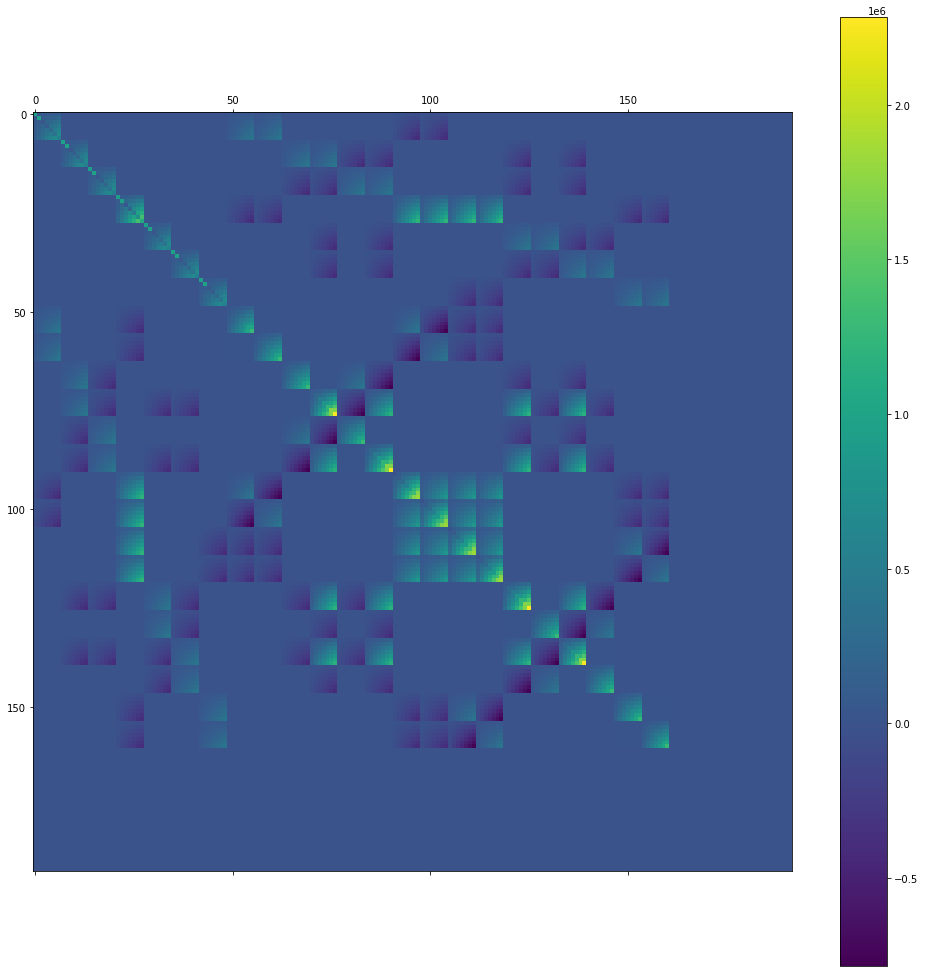

In [88]:
matfig = plt.figure(figsize=(17,17)) 
plt.matshow(QUBO_matrix_2,fignum=matfig.number)
plt.colorbar()
plt.show()

In [89]:
from collections import defaultdict

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import networkx as nx
import numpy as np
import dwave.inspector
import dimod
from dwave.system import LeapHybridSampler
import matplotlib
from matplotlib import pyplot as plt

In [90]:
QUBO = Final_QUBO_matrix

{'qpu_access_time': 59717, 'charge_time': 2999053, 'run_time': 2999053, 'problem_id': '9e08dd73-05a2-4419-b715-3953c306a018'}
[  2  91 162 164 165 166 167 168 169 170 178]
0
13


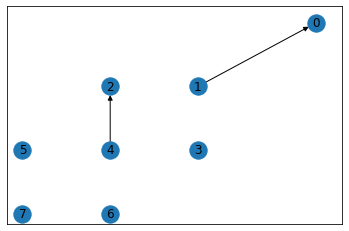

In [105]:
width,height = np.shape(QUBO)

QUBO_dictionary = defaultdict(int)
for i in range(width):
    for j in range(height):
        QUBO_dictionary[(i,j)] = QUBO[i,j]
        

# Select a solver
sampler = LeapHybridSampler()

sampleset = sampler.sample_qubo(QUBO)


OP = sampleset.to_pandas_dataframe()
import pandas as pd

OP = OP.sort_values("energy")
OP_final = OP.to_numpy()

rank = 0

OP_opt = OP_final[rank,:].flatten()
sample = OP_opt.astype(int)

print(sampleset.info)



##
location = np.where(OP_opt[:-2])[0]
print(location)
Q = len(pos)-1  
number_of_edge = len(compelete_label)


final_G = nx.DiGraph()
final_G = nx.from_numpy_array(np.zeros_like(network),create_using=nx.DiGraph(directed=True))
for value in final_index:
    print(str(value//Q))
    final_G .add_edges_from([edge for edge, label in compelete_label.items() if label == str(value//Q)])
    
    
nx.draw_networkx(final_G, pos)

In [117]:
[edge for edge, label in compelete_label.items() if label == str(0)]

[(1, 0)]